In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

In [ ]:
# 1. Load CSV Data

train_path = "/Users/vamshikrishnanalla/Downloads/fashion-mnist_train.csv"
test_path  = "/Users/vamshikrishnanalla/Downloads/fashion-mnist_test.csv"

train_df = pd.read_csv(train_path)
test_df  = pd.read_csv(test_path)

# Split labels and features
y_train = train_df['label'].values
X_train = train_df.drop('label', axis=1).values

y_test = test_df['label'].values
X_test = test_df.drop('label', axis=1).values

In [ ]:
# 2. Preprocessing

# Reshape to (28,28,1) and normalize to [0,1]
X_train = X_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
X_test  = X_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# One-hot encode labels
num_classes = 10
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_cat  = tf.keras.utils.to_categorical(y_test, num_classes)

In [ ]:
# 3. Define CNN Model

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation="softmax")
])

model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.summary()

In [ ]:
# 4. Train Model

history = model.fit(X_train, y_train_cat,
                    epochs=50,
                    batch_size=128,
                    validation_split=0.1)

In [ ]:
# 5. Evaluate Model

test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=2)
print("\nTest Accuracy:", test_acc)

/opt/anaconda3/envs/py312/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.7572 - loss: 0.6679 - val_accuracy: 0.8470 - val_loss: 0.4236
Epoch 2/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.8457 - loss: 0.4310 - val_accuracy: 0.8655 - val_loss: 0.3594
Epoch 3/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.8641 - loss: 0.3756 - val_accuracy: 0.8840 - val_loss: 0.3263
Epoch 4/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.8778 - loss: 0.3435 - val_accuracy: 0.8893 - val_loss: 0.3081
Epoch 5/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.8847 - loss: 0.3182 - val_accuracy: 0.8972 - val_loss: 0.2814
Epoch 6/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.8923 - loss: 0.2966 - val_accuracy: 0.9005 - val_loss: 0.2702
Epoch 7/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.8984 - loss: 0.2784 - val_accuracy: 0.9048 - val_loss: 0.2617
Epoch 8/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9032 - loss: 0.2667 - val_accu

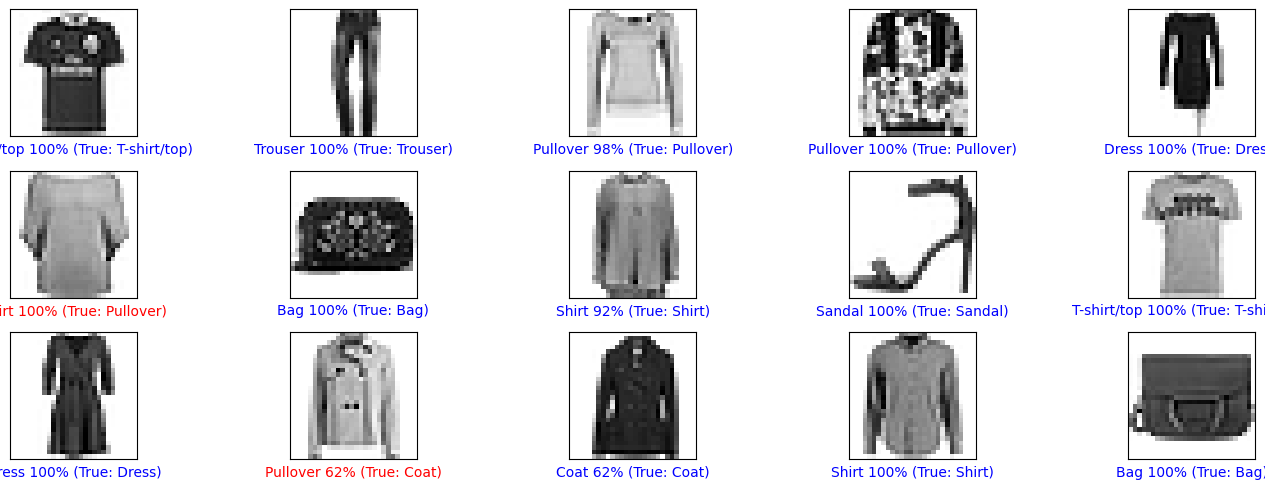

In [2]:
# 6. Predictions
predictions = model.predict(X_test)

# Map labels to class names
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Show some test images with predictions
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img.reshape(28,28), cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'

    plt.xlabel("{} {:2.0f}% (True: {})".format(
        class_names[predicted_label],
        100*np.max(predictions_array),
        class_names[true_label]),
        color=color)

# Display first 15 predictions
num_images = 15
plt.figure(figsize=(15,5))
for i in range(num_images):
    plt.subplot(3,5,i+1)
    plot_image(i, predictions[i], y_test, X_test)
plt.tight_layout()
plt.show()


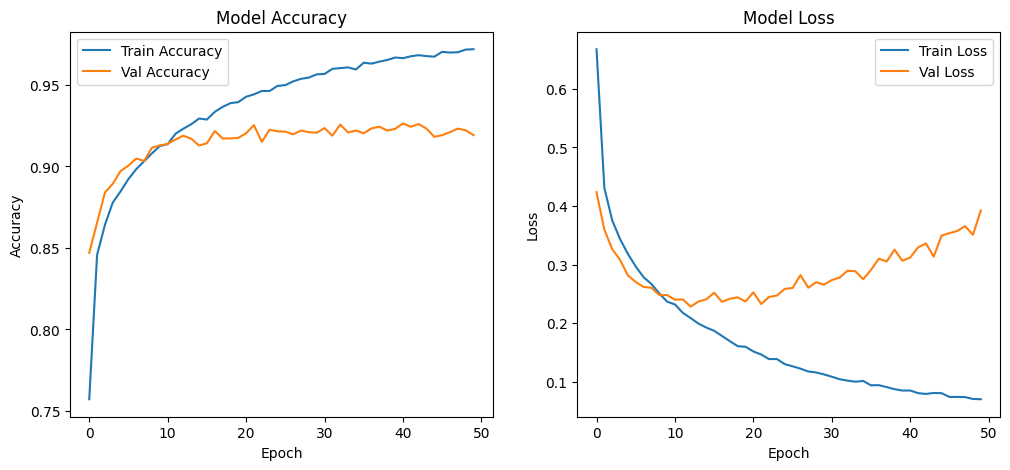

In [5]:
import matplotlib.pyplot as plt

# Plot Accuracy and Loss

plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


I trained the CNN model for 50 epochs. The training accuracy kept improving and reached around 97%, while the validation accuracy leveled off at about 92% after 15–20 epochs. The training loss continued to decrease, but the validation loss began to rise, which shows the model was starting to overfit. Even so, the final test accuracy was about 92%, which is a strong result for the Fashion-MNIST dataset.